C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument wil

TypeError: validation_curve() takes 3 positional arguments but 5 positional arguments (and 1 keyword-only argument) were given

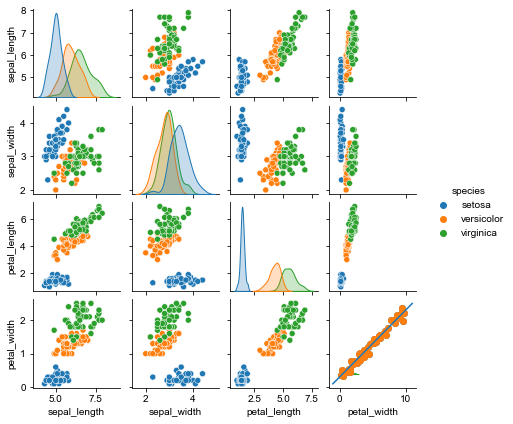

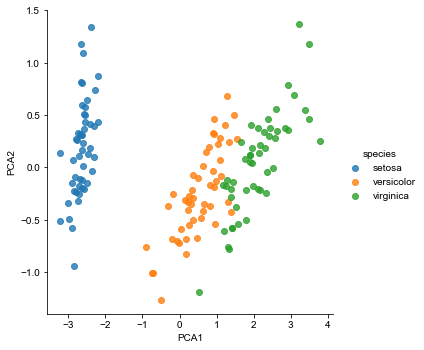

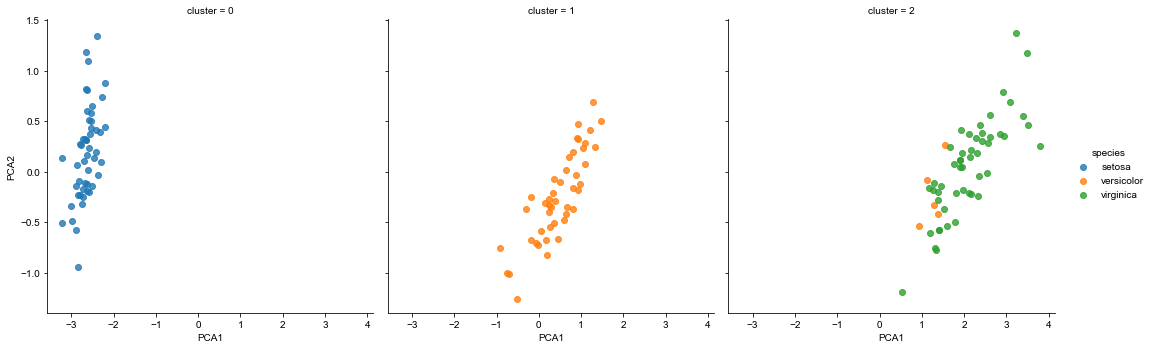

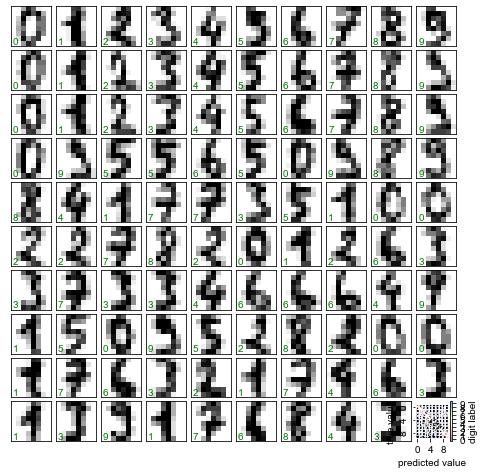

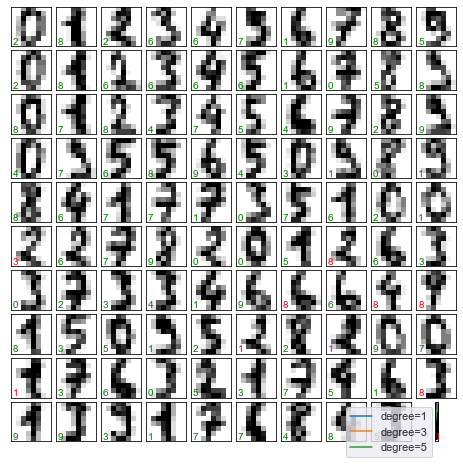

In [1]:
#Supervised learning: Model relationship between measured features of data and label associated with the data - apply labels to new data - classification and regression
#Unsupervised learning: Clustering and dimensionality reduction
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()
#rows are samples, number of rows is n_samples
#columns are features, number is n_features
#features matrix - 2D data representation - often stored as X
#NumPy array, Pandas DataFrame, or SciPy sparse matrices
#label or target array - y (dependent variable)
sns.pairplot(iris, hue='species', size=1.5);

X_iris = iris.drop('species', axis=1)
X_iris.shape
y_iris = iris['species']
y_iris.shape

#Estimator API
#Consistency
#All objects share a common interface drawn from a limited set of methods, with consistent documentation.
#Inspection
#All specified parameter values are exposed as public attributes.
#Limited object hierarchy
#Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrame s, SciPy sparse matrices) and parameter names use standard Python strings.
#Composition
#Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
#Sensible defaults
#When models require user-specified parameters, the library defines an appropriate default value

#1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
#2. Choose model hyperparameters by instantiating this class with desired values.
#3. Arrange data into a features matrix and target vector following the discussion from before.
#4. Fit the model to your data by calling the fit() method of the model instance.
#5. Apply the model to new data:
#    • For supervised learning, often we predict labels for unknown data using the predict() method.
#    • For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.

#Supervised learning: Simple linear regression
import matplotlib.pyplot as plt
import numpy as np
rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True) #storing of hyperparameter values
model
X = x[:, np.newaxis]
X.shape
model.fit(X, y)
model.coef_
model.intercept_
#interpreting model parameters is more a statistical modeling question than a machine learning question, but if you want inferences:
import statsmodels.api as sm
X = sm.add_constant(X)
ols = sm.OLS(y, X)
ols_result = ols.fit()
# Now you have at your disposition several error estimates, e.g.
ols_result.HC0_se
# and covariance estimates
ols_result.cov_HC0
#confidence intervals
ols_result.conf_int()
#p-values (which may come in handy for pubs, but please do not rely on them for this class!)
ols_result.pvalues

#prediction
xfit = np.linspace(-1, 11)
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)
plt.scatter(x, y)
plt.plot(xfit, yfit);

#TODO: Fit the same linear regression you did for homework 2 using the LinearRegression model, and compare the results

#evaluate efficacy of model by comparing results to known baseline
#given a model trained on a portion of the Iris data, how well can we predict the remaining labels?
#Because it is so fast and has no hyperparameters to choose, Gaussian naive Bayes is often a good model to use as a baseline classification, before you explore whether improvements can be found through more sophisticated models.
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
random_state=1)

from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB() # 2. instantiate model
model.fit(Xtrain, ytrain) # 3. fit model to data
y_model = model.predict(Xtest) # 4. predict on new data

#accuracy
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

#TODO: Using the same homework 2 data, split your data into a train and test sample, and test the accuracy score

#Unsupervised learning: Dimensionality reduction
#Principal components analysis: fast linear dimensionality reduction technique
from sklearn.decomposition import PCA # 1. Choose the model class
model = PCA(n_components=2) # 2. Instantiate the model with hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris) # 4. Transform the data to two dimensions

#2D species are well separated, even without labels
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

#Unsupervised learning: Iris clustering
#Gaussian mixture model: Model data as collection of Gaussian blobs
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3, covariance_type='full') # 2. Instantiate the model w/ hyperparameters
model.fit(X_iris) # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris) # 4. Determine cluster labels

#Add cluster label - Automatically identify presence of different groups of species
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species', col='cluster', fit_reg=False);

#Application: Exploring Handwritten Digits
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

#The images data is a three-dimensional array: 1,797 samples, each consisting of an 8×8 grid of pixels. Let’s visualize the first hundred of these
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')

#Treat each pixel as a feature - flatten out the array so we have length-64 array of pixel values representing each digit
X = digits.data
X.shape
y = digits.target
y.shape

#Unsupervised learning: Dimensionality reduction - Isomap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('Spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);
#generally good separation in parameter space

#classification
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)
#Gaussian naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

accuracy_score(ytest, y_model) #good considering the simplicity of the model
#where did we go wrong? Confusion matrix shows frequency of misclassification
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');
#plot inputs with predicted labels
fig, axes = plt.subplots(10, 10, figsize=(8, 8), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]), transform=ax.transAxes, color='green' if (ytest[i] == y_model[i]) else 'red')


#to make an informed choice, we need a way to validate that our model and our hyperparameters are a good fit to the data
#Model validation the wrong way
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target
#Here we'll use a k-neighbors classifier with n_neighbors=1 . This is a very simple and intuitive model that says 'the label of an unknown point is the same as the label of its closest training point'
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)
#Then we train the model, and use it to predict labels for data we already know
model.fit(X, y)
y_model = model.predict(X)
accuracy_score(y, y_model)

#Model validation the right way: Holdout sets
# split the data with 50% in each set
X1, X2, y1, y2 = train_test_split(X, y, random_state=0, train_size=0.5, test_size=0.5)
# fit the model on one set of data
model.fit(X1, y1)
# evaluate the model on the second set of data
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

#Model validation via cross-validation
y2_model = model.fit(X1, y1).predict(X2)
y1_model = model.fit(X2, y2).predict(X1)
accuracy_score(y1, y1_model), accuracy_score(y2, y2_model)
#more than 2 sets
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

#loo
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

scores.mean()

#Selecting the Best Model
# Use a more complicated/more flexible model
# Use a less complicated/less flexible model
# Gather more training samples
# Gather more data to add features to each sample

#The bias-variance trade-off
#High-bias model: Underfits the data
#High-variance model: Overfits the data
#For high-bias models, the performance of the model on the validation set is similar to the performance on the training set.
#For high-variance models, the performance of the model on the validation set is far worse than the performance on the training set.

#The training score is everywhere higher than the validation score. This is generally the case: the model will be a better fit to data it has seen than to data it has not seen.
#For very low model complexity (a high-bias model), the training data is underfit, which means that the model is a poor predictor both for the training data and for any previously unseen data.
#For very high model complexity (a high-variance model), the training data is overfit, which means that the model predicts the training data very well, but fails for any previously unseen data.
#For some intermediate value, the validation curve has a maximum. This level of complexity indicates a suitable trade-off between bias and variance.

#Validation curves
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

def make_data(N, err=1.0, rseed=1):
    # randomly sample the data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

import seaborn; seaborn.set() # plot formatting
X_test = np.linspace(-0.1, 1.1, 500)[:, None]
plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');
#degree of polynomial is knob controlling model complexity

from sklearn.model_selection import validation_curve
degree = np.arange(0, 21)
train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeatures__degree', degree, cv=7)
plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

#TODO: Again using the same data you used for homework 2, fit polynomials and determine the optimal degree to use

#Optimal model will generally depend on size of training data
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

degree = np.arange(21)
train_score2, val_score2 = validation_curve(PolynomialRegression(), X2, y2,
'polynomialfeatures__degree',
degree, cv=7)
plt.plot(degree, np.median(train_score2, 1), color='blue',
label='training score')
plt.plot(degree, np.median(val_score2, 1), color='red', label='validation score')
plt.plot(degree, np.median(train_score, 1), color='blue', alpha=0.3,
linestyle='dashed')
plt.plot(degree, np.median(val_score, 1), color='red', alpha=0.3,
linestyle='dashed')
plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');
#behavior of validation curve has two important inputs: complexity and number of training points

#plot of the training/validation score with respect to the size of the training set is known as a learning curve
#A model of a given complexity will overfit a small dataset: this means the training score will be relatively high, while the validation score will be relatively low.
#A model of a given complexity will underfit a large dataset: this means that the training score will decrease, but the validation score will increase.
#A model will never, except by chance, give a better score to the validation set than the training set: this means the curves should keep getting closer together but never cross.

#The notable feature of the learning curve is the convergence to a particular score as the number of training samples grows. In particular, once you have enough points that a particular model has converged, adding more training data will not help you! The only way to increase model performance in this case is to use another (often more complex) model.

from sklearn.model_selection import learning_curve
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree), X, y, cv=7, train_sizes=np.linspace(0.3, 1, 25))
    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1], color='gray', linestyle='dashed')
    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')


#In practice, models generally have more than one knob to turn, and thus plots of validation and learning curves change from lines to multidimensional surfaces. In these cases, such visualizations are difficult and we would rather simply find the particular model that maximizes the validation score.

#We will explore a three-dimensional grid of model features—namely, the polynomial degree, the flag telling us whether to fit the intercept, and the flag telling us whether to normalize the problem

from sklearn.model_selection import GridSearchCV
param_grid = {'polynomialfeatures__degree': np.arange(21),
'linearregression__fit_intercept': [True, False],
'linearregression__normalize': [True, False]}
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)
grid.fit(X, y);
grid.best_params_

#with normalize == True, why is fit_intercept == False?

model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);


#Feature engineering
#one of the more important steps in using machine learning in practice is feature engineering—that is, taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix

#categorical features
data = [
    {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
    {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
    {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
    {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
]
#one-hot encoding; extra columns indicating the presence or absence of a category with a value of 1 or 0
from sklearn.feature_extraction import DictVectorizer
vec = DictVectorizer(sparse=False, dtype=int)
vec.fit_transform(data) #notice it is in alphabetical order

vec.get_feature_names()

#if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution
vec = DictVectorizer(sparse=True, dtype=int)
vec.fit_transform(data)


#text features
#word counts
sample = ['problem of evil',
'evil queen',
'horizon problem']
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()
X = vec.fit_transform(sample)
X

import pandas as pd
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

#down-weighting frequent words; term frequency–inverse document frequency (TF–IDF), which weights the word counts by a measure of how often they appear in the documents
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer()
X = vec.fit_transform(sample)
pd.DataFrame(X.toarray(), columns=vec.get_feature_names())

#if interested in image feature extraction, see SciKit-Image project

#derived features: transforming input - basis function regression
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])
plt.scatter(x, y);

from sklearn.linear_model import LinearRegression
X = x[:, np.newaxis]
model = LinearRegression().fit(X, y)
yfit = model.predict(X)
plt.scatter(x, y)
plt.plot(x, yfit);

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False)
X2 = poly.fit_transform(X)
print(X2)

model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

#TODO: Do the same as above, fitting a polynomial to your data, but use this PolynomialFeatures method instead

#imputation of missing data
from numpy import nan
X = np.array([[ nan, 0, 3],
[ 3, 7, 9],
[ 3, 5, 2],
[ 4, nan, 6],
[ 8, 8, 1]])
y = np.array([14, 16, -1, 8, -5])
#simply use the mean (also can use median or most_frequent value)
from sklearn.preprocessing import Imputer
imp = Imputer(strategy='mean')
X2 = imp.fit_transform(X)
X2

model = LinearRegression().fit(X2, y)
model.predict(X2)
#if missingness is problematic, consider MICE

#TODO: Fill in missing values in your data using different methods, and see if your substantive results change when modeling

#feature pipelines - suppose we want to:
#1. Impute missing values using the mean
#2. Transform features to quadratic
#3. Fit a linear regression
from sklearn.pipeline import make_pipeline
model = make_pipeline(Imputer(strategy='mean'),
    PolynomialFeatures(degree=2),
    LinearRegression())

model.fit(X, y) # X with missing values, from above
print(y)
print(model.predict(X))





